Download the dataset via wget on Google Colab and rename the zip

In [ ]:
!wget https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip?dl=1

--2020-06-28 11:57:01--  https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip?dl=1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86, 2606:4700:7::a29f:8256, ...
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497 [following]
--2020-06-28 11:57:02--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.84.83
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.84.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1235

In [ ]:
!mv ChestXRay2017.zip?dl=1 ChestXRay2017.zip
!unzip ChestXRay2017.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: chest_xray/train/P

In [ ]:
!ls ./chest_xray/train/NORMAL

IM-0115-0001.jpeg		NORMAL2-IM-0482-0001.jpeg
IM-0117-0001.jpeg		NORMAL2-IM-0485-0001.jpeg
IM-0119-0001.jpeg		NORMAL2-IM-0486-0001.jpeg
IM-0122-0001.jpeg		NORMAL2-IM-0487-0001.jpeg
IM-0125-0001.jpeg		NORMAL2-IM-0488-0001.jpeg
IM-0127-0001.jpeg		NORMAL2-IM-0489-0001.jpeg
IM-0128-0001.jpeg		NORMAL2-IM-0490-0001.jpeg
IM-0129-0001.jpeg		NORMAL2-IM-0491-0001.jpeg
IM-0131-0001.jpeg		NORMAL2-IM-0493-0001.jpeg
IM-0133-0001.jpeg		NORMAL2-IM-0496-0001.jpeg
IM-0135-0001.jpeg		NORMAL2-IM-0497-0001.jpeg
IM-0137-0001.jpeg		NORMAL2-IM-0499-0001.jpeg
IM-0140-0001.jpeg		NORMAL2-IM-0500-0001.jpeg
IM-0141-0001.jpeg		NORMAL2-IM-0501-0001.jpeg
IM-0143-0001.jpeg		NORMAL2-IM-0502-0001.jpeg
IM-0145-0001.jpeg		NORMAL2-IM-0503-0001.jpeg
IM-0147-0001.jpeg		NORMAL2-IM-0506-0001.jpeg
IM-0149-0001.jpeg		NORMAL2-IM-0507-0001.jpeg
IM-0151-0001.jpeg		NORMAL2-IM-0508-0001.jpeg
IM-0152-0001.jpeg		NORMAL2-IM-0509-0001.jpeg
IM-0154-0001.jpeg		NORMAL2-IM-0511-0001.jpeg
IM-0156-0001.jpeg		NORMAL2-IM-0512-0001.jpeg
IM-0158-00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import glob
%matplotlib inline

In [ ]:
mainDIR = os.listdir('chest_xray/')
print(mainDIR)

['test', '.DS_Store', 'train']


In [ ]:
WIDTH = 64
HEIGHT = 64

Set training and testing directory path.

In [ ]:
train_folder= 'chest_xray/train/'
test_folder = 'chest_xray/test/'

os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

test_n = test_folder+'NORMAL/'
test_p = test_folder+'PNEUMONIA/'

In [ ]:
print("Normal Training Images : ",len(os.listdir(train_n)))
print("Pneumonia Training Images : ",len(os.listdir(train_p)))

print("\nNormal Testing Images : ",len(os.listdir(test_n)))
print("Pneumonia Testing Images : ",len(os.listdir(test_p)))

Normal Training Images :  1349
Pneumonia Training Images :  3884

Normal Testing Images :  234
Pneumonia Testing Images :  390


Use glob to set train and test dirs and visualize few images

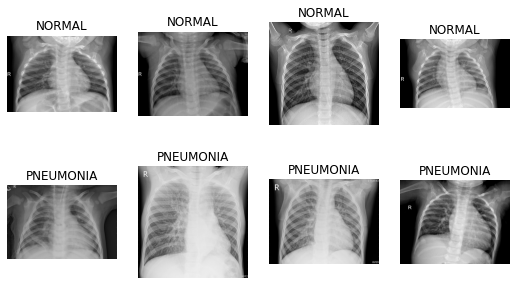

In [ ]:
from PIL import Image
from glob import glob

train_normal = glob("chest_xray/train/NORMAL/*.jpeg")
train_pneumonia = glob("chest_xray/train/PNEUMONIA/*.jpeg")

random_normal = np.random.choice(train_normal, 4)
random_pneumonia = np.random.choice(train_pneumonia, 4)

data = np.concatenate((random_normal,random_pneumonia))
labels = 4 * ["NORMAL"] + 4 * ["PNEUMONIA"]

N, R, C = 8, 2, 4
plt.figure(figsize=(9, 5))

for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

Building a custom CNN for classification

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten,Activation
from keras.layers import Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(WIDTH,HEIGHT,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss=["binary_crossentropy"], metrics=["accuracy"])

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [ ]:
test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [ ]:
BATCH_SIZE = 32
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(WIDTH,HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle=True,
    color_mode="rgb"
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(WIDTH,HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    shuffle=True,
    color_mode="rgb"
)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS = test_generator.n//test_generator.batch_size
EPOCH = 7

history = model.fit(
    train_generator,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs = EPOCH,
    validation_data = test_generator,
    validation_steps = VALIDATION_STEPS
)

Epoch 1/7
163/163 [==============================] - 67s 414ms/step - loss: 1.0942 - accuracy: 0.7252 - val_loss: 0.6118 - val_accuracy: 0.6234
Epoch 2/7
163/163 [==============================] - 67s 410ms/step - loss: 0.5536 - accuracy: 0.7425 - val_loss: 0.6430 - val_accuracy: 0.6318
Epoch 3/7
163/163 [==============================] - 66s 407ms/step - loss: 0.4947 - accuracy: 0.7475 - val_loss: 0.6486 - val_accuracy: 0.6402
Epoch 4/7
163/163 [==============================] - 66s 405ms/step - loss: 0.4804 - accuracy: 0.7581 - val_loss: 0.5726 - val_accuracy: 0.7010
Epoch 5/7
163/163 [==============================] - 66s 403ms/step - loss: 0.4594 - accuracy: 0.7648 - val_loss: 0.6378 - val_accuracy: 0.6588
Epoch 6/7
163/163 [==============================] - 66s 403ms/step - loss: 0.4332 - accuracy: 0.7821 - val_loss: 0.4865 - val_accuracy: 0.6858
Epoch 7/7
163/163 [==============================] - 65s 399ms/step - loss: 0.4298 - accuracy: 0.7877 - val_loss: 0.5036 - val_accuracy:

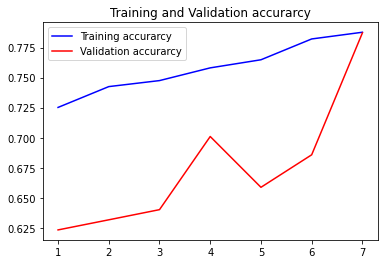

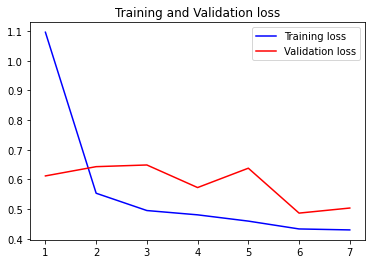

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.72%


Transfer Learning - VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras import backend as K
from keras.models import Model
K.clear_session()

NUM_CLASSES = 2
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu') (x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=x)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [ ]:
def print_layers(model):
    for idx, layer in enumerate(model.layers):
        print("layer {}: {}, trainable: {}".format(idx, layer.name, layer.trainable))

for layer in model.layers[0:18]:
    layer.trainable = False
    
print_layers(model)

layer 0: input_1, trainable: False
layer 1: block1_conv1, trainable: False
layer 2: block1_conv2, trainable: False
layer 3: block1_pool, trainable: False
layer 4: block2_conv1, trainable: False
layer 5: block2_conv2, trainable: False
layer 6: block2_pool, trainable: False
layer 7: block3_conv1, trainable: False
layer 8: block3_conv2, trainable: False
layer 9: block3_conv3, trainable: False
layer 10: block3_pool, trainable: False
layer 11: block4_conv1, trainable: False
layer 12: block4_conv2, trainable: False
layer 13: block4_conv3, trainable: False
layer 14: block4_pool, trainable: False
layer 15: block5_conv1, trainable: False
layer 16: block5_conv2, trainable: False
layer 17: block5_conv3, trainable: False
layer 18: block5_pool, trainable: True
layer 19: flatten_1, trainable: True
layer 20: dense_1, trainable: True
layer 21: dense_2, trainable: True


In [ ]:
model.compile(optimizer='adam', loss=["binary_crossentropy"], metrics=["accuracy"])

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS = test_generator.n//test_generator.batch_size
EPOCH = 7

history = model.fit(
    train_generator,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs = EPOCH,
    validation_data = test_generator,
    validation_steps = VALIDATION_STEPS
)

Epoch 1/7
163/163 [==============================] - 68s 419ms/step - loss: 1.5721 - accuracy: 0.8592 - val_loss: 1.2823 - val_accuracy: 0.7911
Epoch 2/7
163/163 [==============================] - 69s 426ms/step - loss: 0.3300 - accuracy: 0.8892 - val_loss: 1.0162 - val_accuracy: 0.7517
Epoch 3/7
163/163 [==============================] - 69s 424ms/step - loss: 0.2517 - accuracy: 0.9033 - val_loss: 0.6507 - val_accuracy: 0.7568
Epoch 4/7
163/163 [==============================] - 69s 425ms/step - loss: 0.2313 - accuracy: 0.9079 - val_loss: 0.4393 - val_accuracy: 0.7855
Epoch 5/7
163/163 [==============================] - 69s 421ms/step - loss: 0.2082 - accuracy: 0.9198 - val_loss: 0.2976 - val_accuracy: 0.7939
Epoch 6/7
163/163 [==============================] - 69s 422ms/step - loss: 0.1940 - accuracy: 0.9212 - val_loss: 0.2756 - val_accuracy: 0.8024
Epoch 7/7
163/163 [==============================] - 68s 419ms/step - loss: 0.1969 - accuracy: 0.9246 - val_loss: 0.6767 - val_accuracy:

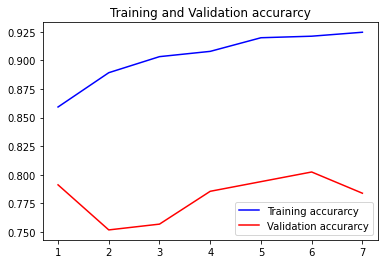

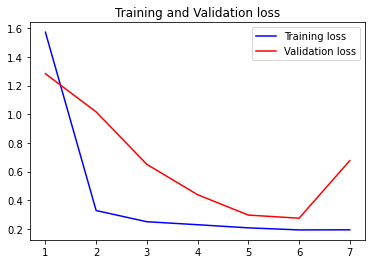

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.56%
